In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
from adjustText import adjust_text

import plotlib as plib

## Load data

In [2]:
# Load data
pglsDir = '../../scripts/pgls_res/'

mod = pd.read_csv(pglsDir + 'DNMs.model_params.tsv', sep='\t')
dat = pd.read_csv(pglsDir + 'DNMs.xy_data.tsv', sep='\t')      

configTypes = {'xlog':bool}
config = pd.read_csv('../../scripts/pgls_config_file.DNMs.txt', sep='\t', index_col='x', dtype=configTypes, comment='#')

# Color data
c = pd.read_csv('../../data/plot_colors.tsv', sep='\t', index_col='Order')['Color']['Mammals']

# Common names
commonDat = pd.read_csv('../../data/Table_S1_v4.csv', sep=',', index_col='Species')['Common_name']

## Plot mammal longevity and metabolic data

In [3]:
eList = ['Predicted_alpha_dnms.Alpha_dnm', 
         'Predicted_alpha_dnms_min2trios.Alpha_dnm']

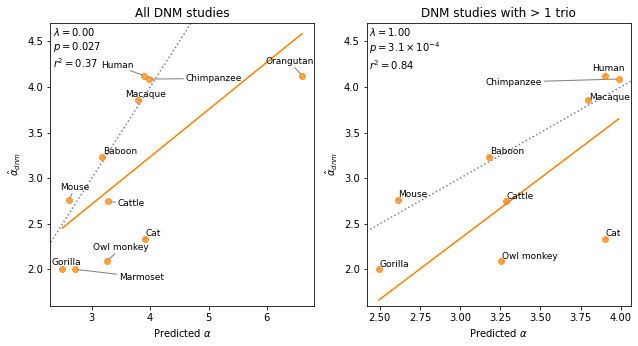

In [4]:
### Two plots
nr, nc = [1, 2]
fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(5.2*nc, 5.2*nr))


useTitles = ['All DNM studies', 'DNM studies with > 1 trio']

for j in range(nc):
    e = eList[j]
    
    ptDat = dat.loc[dat['experiment'] == e,].copy()
    ptDat['Common'] = commonDat[ptDat.Species].values
    xmin, xmax = min(ptDat.xvar) , max(ptDat.xvar)
    
    lnDat = mod.loc[mod['experiment'] == e,].squeeze()
    
    # Plot regression line
    plib.plot_line(lnDat.pgls_ml_intercept, lnDat.pgls_ml_slope, 
                   xmin = xmin, xmax = xmax, c = c, ax = axs[j])

    # Plot scatter
    axs[j].scatter('xvar', 'yvar', data=ptDat, c=c, edgecolors=c, alpha=0.7, zorder=10)

    # Identity line
    plib.identity_line(axs[j], color="gray", ls="dotted")

    # Point labels
#     texts = texts + [axs[j].text(r.xvar, r.yvar, r.Common, size=9, c="black") for i,r in ptDat.iterrows()]
    texts = [axs[j].text(r.xvar, r.yvar, r.Common, size=9, c="black") for i,r in ptDat.iterrows()]
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'), expand_text=[2,2], ax=axs[j])

    # Legend text
    lab = plib.make_pgls_legend(lnDat.ml_lambda, lnDat.pgls_ml_pval, lnDat.pgls_ml_rsq)
    axs[j].annotate(lab, xy=(0.01, 0.99), xycoords='axes fraction', verticalalignment='top')
    
    axs[j].set_ylim(1.6, 4.7)
    
    axs[j].set_xlabel(r'Predicted $\alpha$')
    axs[j].set_ylabel(r'$\hat{\alpha}_{dnm}$')
    axs[j].set_title(useTitles[j])


# adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'), expand_text=[2,2], )

plt.show(fig)
fig.savefig('../pdfs/Figure_SX_Predicted_alpha_dnms.pdf')

In [5]:
# # One plot two lines
# def makeLegendLab(clade, lam, pval, r2):
#     outstr = '{}:\n'.format(clade) + r'$\lambda = {:0.2f}, p = {:0.3f}, r^2 = {:0.2f}$'.format(lam, pval, r2)
#     return outstr

# fig, axs = plt.subplots(figsize=(5, 5))

# ptList, legList = [], []
# for e in eList:
# ptDat = dat.loc[dat['experiment'] == e,].copy()
# ptDat['Common'] = commonDat[ptDat.Species].values
# xmin, xmax = min(ptDat.xvar) , max(ptDat.xvar)

# lnDat = mod.loc[mod['experiment'] == e,].squeeze()

# # Plot regression line
# plib.plot_line(lnDat.pgls_ml_intercept, lnDat.pgls_ml_slope, 
#                xmin = xmin, xmax = xmax, c = c, ax = axs)

# # Plot scatter
# axs.scatter('xvar', 'yvar', data=ptDat, c=c, edgecolors=c, alpha=0.7, zorder=10)

# # Identity line
# plib.identity_line(axs, color="gray", ls="dotted")

# # Point labels
# texts = [axs.text(r.xvar, r.yvar, r.Common, size=9, c="black") for i,r in ptDat.iterrows()]
# adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'), expand_text=[2,2])

# # Legend text
# lab = plib.make_pgls_legend(lnDat.ml_lambda, lnDat.pgls_ml_pval, lnDat.pgls_ml_rsq)
# axs.annotate(lab, xy=(0.01, 0.99), xycoords='axes fraction', verticalalignment='top')




# # axs.set_xlim((np.log10(0.5), np.log10(40)))
# # axs.set_ylim((0.6, 4.3))

# axs.set_xlabel(r'Predicted $\alpha$')
# axs.set_ylabel(r'$\hat{\alpha}_{dnm}$')

# sns.despine()

# plt.tight_layout()

# # fig.savefig('../pdfs/Figure_SX_Predicted_alpha_dnms.pdf')


In [6]:
### All studies
# fig, axs = plt.subplots(figsize=(5, 5))


# ptDat = dat.loc[dat['experiment'] == e,].copy()
# ptDat['Common'] = commonDat[ptDat.Species].values
# xmin, xmax = min(ptDat.xvar) , max(ptDat.xvar)

# lnDat = mod.loc[mod['experiment'] == e,].squeeze()

# # Plot regression line
# plib.plot_line(lnDat.pgls_ml_intercept, lnDat.pgls_ml_slope, 
#                xmin = xmin, xmax = xmax, c = c, ax = axs)

# # Plot scatter
# axs.scatter('xvar', 'yvar', data=ptDat, c=c, edgecolors=c, alpha=0.7, zorder=10)

# # Identity line
# plib.identity_line(axs, color="gray", ls="dotted")

# # Point labels
# texts = [axs.text(r.xvar, r.yvar, r.Common, size=9, c="black") for i,r in ptDat.iterrows()]
# adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'), expand_text=[2,2])

# # Legend text
# lab = plib.make_pgls_legend(lnDat.ml_lambda, lnDat.pgls_ml_pval, lnDat.pgls_ml_rsq)
# axs.annotate(lab, xy=(0.01, 0.99), xycoords='axes fraction', verticalalignment='top')




# # axs.set_xlim((np.log10(0.5), np.log10(40)))
# # axs.set_ylim((0.6, 4.3))

# axs.set_xlabel(r'Predicted $\alpha$')
# axs.set_ylabel(r'$\hat{\alpha}_{dnm}$')

# sns.despine()

# plt.tight_layout()

# # fig.savefig('../pdfs/Figure_SX_Predicted_alpha_dnms.pdf')
